# Is there evidence of phylogeography in the protein sequence composition of soil viral communities?

Russell Neches, August 24, 2018

Phylogeography is the geographically structuring of genetic signals within and among species <cite data-cite="2799022/PJYDMATY"></cite>. One way this can manifest is as a distance-decay relationship, a positive correlation of the phylogenetic distances between genetic elements and the geographic distance between them. There are a variety of processes that can explain this structuring. See Table 1 from Avise *et al.* for a 
listing of foundational studies <cite data-cite="2799022/72DM6KWJ"></cite>. Repeated allopatric speciation events can divide a large, ancestral geographic range of a species into nested, hierarchical sub-ranges. For example, the gradual breakup of the Gondwanan super-continent is thought to have structured the flora and fauna of the Mesozoic and their progeny. Alternatively, a distance-decay relationship can appear when the divergence of a genetic element takes place on similar time scales to the geographic dispersal of the organism that carries it. <cite data-cite="2799022/VSVC8IVY"></cite> When these conditions are met, it is possible to apply event-based modeling to reconstruct the most likely natural history given available evidence.
<cite data-cite="2799022/5RT9LSZX"></cite>
<cite data-cite="2799022/N7CPBSTU"></cite>
<cite data-cite="2799022/6S9MGJ9H"></cite>
<cite data-cite="2799022/QDVUZZ68"></cite>
<cite data-cite="2799022/III87MLN"></cite>
<cite data-cite="2799022/I3UAEQNT"></cite>

Distance-decay relationships have also been studied to microbial organisms, notably [*sulfolobus islandicus*](https://microbewiki.kenyon.edu/index.php/Sulfolobus_islandicus) <cite data-cite="2799022/RK8T88Z9"></cite> <cite data-cite="2799022/ASH5A6YM"></cite> <cite data-cite="2799022/TZRJ39BC"></cite> and its viruses <cite data-cite="2799022/RXACUFM9"></cite>. 

Because viruses recombine with one another at high rates and lack a conserved set of housekeeping genes, inference of clear phylogenetic relationships is often difficult. 
<cite data-cite="2799022/VEHE38ZK"></cite>
<cite data-cite="2799022/DDSUEAEA"></cite>
<cite data-cite="2799022/S5PL9GQU"></cite>
<cite data-cite="2799022/36GWF65Q"></cite>
<cite data-cite="2799022/VMZEADLX"></cite>
However, a biogeography of viral dispersal can be inferred by tracking the geographic distribution of individual genes. Here, we examine the 10,000 largest viral protein families for phylogeographic signal. Because recombination can also complicate phylogenetic inference within individual genes, we examined only viral protein families whose members align with one another, but not with members of other protein families.

## Methods

An all-verses-all alignment of open reading frames from metagenomic viral contigs was peformed using `LAST` <cite data-cite="2799022/WE9SX2RW"></cite>. Alignment output was staged using `pandas` <cite data-cite="2799022/5AYU4ZX7"></cite>. A weighted undirected graph was populated using `networkx` <cite data-cite="2799022/QJJW2R8F"></cite>, with predicted viral genes represented as nodes, sequence alignments represented as edges and alignment bitscores represented as edge weights. Connected components were extracted and sorted by number of members; the sequences of each connected component comprise a viral protein family. The largest connected component contained a high proportion number of short alignments relative to other connected components. These short alignments appear to represent putative recombination events, convergence and coincidental alignments, and so this large connected component was excluded from subsequent analysis. For each viral protein family, a multiple sequence alignment was performed using Clustal Omega <cite data-cite="2799022/94BKJAJK"></cite>, and approximate maximum likelihood phylogenies were inferred using `fasttree` <cite data-cite="2799022/ZTE6IA6W"></cite>. The geographic and phylogenetic distances were calculated using `SuchTree` <cite data-cite="2799022/ZPTY4REC"></cite> and `Cartopy` <cite data-cite="2799022/EZUBLWLV"></cite>, and their correlation was estimated using the rank-order correlation coefficient, Kendall's $\tau$ <cite data-cite="2799022/W46WC73N"></cite>, and the $p$-values were corrected for multiple testing using the Simes-Hochberg step-up procedure <cite data-cite="2799022/YDX8TEV3"></cite>.

### Workflow

1. An all-verses-all alignment was performed with [LAST](http://last.cbrc.jp/) <cite data-cite="2799022/WE9SX2RW"></cite>
2. Alignment summary loaded in [`pandas`](https://pandas.pydata.org/) to remove self-to-self alignments <cite data-cite="2799022/5AYU4ZX7"></cite>
3. Alignment hits loaded as an undirected graph using [`networkx`](https://networkx.github.io/) <cite data-cite="2799022/QJJW2R8F"></cite>
4. Identify protein families by extracting connected components
5. Build multiple sequence alignments for protein families with [Clustal Omega](http://www.clustal.org/omega/) <cite data-cite="2799022/94BKJAJK"></cite>
6. Build approximate maximum likelihood phylogenetic trees for protein families with [`fasttree`](http://www.microbesonline.org/fasttree/) <cite data-cite="2799022/ZTE6IA6W"></cite>
7. Calculate correlation between phylogenetic and geographic distance using `SuchTree` <cite data-cite="2799022/ZPTY4REC"></cite>
8. Correct p-values for multiple testing

## Results

Of the 10,000 largest viral protein families, 1,242 protein families showed a statistically significant rank-order correlation between the phylogenetic and geographic distances among their members, indicating a distance-decay relationship that is consistent with dispersal. Moreover, among all protein families, the strength of the correlation between phylogenetic and geographic distance of within viral protein families is itself anti-correlated with their phylogeneticly-weighted diversity.

## Conclusions

About 12% of viral protein families exhibit evidence of biogeographic structuring consistent with dispersal. While this observation alone does not allow us to draw conclusions about the rate of evolutionary divergence or geographic dispersal of viral genes, it does indicate that the *relative* rates of these processes are often similar. If either the rate were known for these protein families, however, the other could be inferred.

The inverse correlation between the strength of distance-decay relationships within viral protein families and their diversity suggests an upper bound on the dispersal-structured biogeography imposed by the finite size of the planet. As a viral gene evolves and disperses over a larger area, the likelihood that its members will overrun one another increases.

In [178]:
%pylab inline
%config InlineBackend.figure_format='retina'
import pandas
import networkx
import pyprind
import seaborn
import random
import screed
from grave import grave
import cartopy.crs
from cartopy.io.img_tiles import OSM
from netCDF4 import Dataset
from Bio.SeqUtils import ProtParam
from SuchTree import SuchTree

import warnings
warnings.simplefilter( 'ignore', UserWarning )

Populating the interactive namespace from numpy and matplotlib


## Protein families

#### Alignment

First, we perform an all-vs-all alignment using [LAST](http://last.cbrc.jp/) of
all the putative viral genes.

In [ ]:
!lastdb -P 8 -cR01 -v -p svdb soil_viruses.faa
!lastal -P32 -v -f BlastTab+ svdb soil_viruses.faa > scratch/all_v_all.tsv

The `BlastTab+` output format for LAST has the following fields, delimited by tabs :

0. query id
* subject id
* % identity
* alignment length
* mismatches
* gap opens
* q. start
* q. end
* s. start
* s. end
* evalue
* bit score
* query length
* subject length
* raw score

There is also a long header escaped by `#` characters, and the column names are weirdly separated by commas and missing the last column. So, there's no way around parsing the column names separately.

In [2]:
df = pandas.read_csv( 'scratch/all_v_all.tsv', sep='\t', header=None, comment='#' )
df.columns = [ field.strip() for field in open( 'scratch/all_v_all.tsv' ).readlines()[35][10:].split(',') ] + ['raw score']
df.head()

query id  \
0  2088090008_____P3_DRAFT_NODE_290175_len_15711_...   
1  2088090008_____P3_DRAFT_NODE_290175_len_15711_...   
2  2088090008_____P3_DRAFT_NODE_290175_len_15711_...   
3  2088090008_____P3_DRAFT_NODE_290175_len_15711_...   
4  2088090008_____P3_DRAFT_NODE_290175_len_15711_...   

                                          subject id  % identity  \
0  2088090008_____P3_DRAFT_NODE_290175_len_15711_...      100.00   
1  3300002243_____C687J29039_10000481_____C687J29...       74.17   
2  3300014493_____Ga0182016_10005848_____Ga018201...       51.11   
3  3300006638_____Ga0075522_10000183_____Ga007552...       43.88   
4  3300001160_____JGI12654J13325_1000002_____JGI1...       47.06   

   alignment length  mismatches  gap opens  q. start  q. end  s. start  \
0               160           0          0         1     160         1   
1               151          38          1         1     150       297   
2               135          64          2        14     148       275   
3               139          77          1         9     147       261   
4               136          71          1         9     144       267   

   s. end         evalue  bit score  query length  subject length  raw score  
0     160  6.200000e-126      397.0           160             160        892  
1     447   1.700000e-81      271.0           160             456        606  
2     407   2.200000e-39      150.0           160             413        333  
3     398   3.500000e-36      141.0           160             431        312  
4     401   8.200000e-35      137.0           160             411        303

In [3]:
# drop self-to-self alignments

df = df.where( df['subject id'] != df['query id'] ).dropna()

#### Alignment graph construction

Now that table of alignment summaries is ready, let's treat each alignment as an edge in an undirected graph. This has the (desirable) side effect of collapsing A-to-B and B-to-A alignments into a single edge. We'll use the LAST bit score of each alignment as the edge weight.

In [4]:
G = networkx.Graph()
G.add_nodes_from( set( df['query id'] ) | set( df['subject id'] ) )

progbar = pyprind.ProgBar( df.shape[0], title='adding graph edges...' )

for n,row in df.iterrows() :
    progbar.update()
    G.add_edge( row['subject id'], row['query id'], weight=row['bit score'] )

adding graph edges...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:17:51


#### Connected component extraction

Next, we decompose the alignment graph into its connected components. These are
our putative viral protein families.

In [5]:
# get the adjacency matrix in sparse form
aj = networkx.to_scipy_sparse_matrix(G)

# decompose graph into connected component subgraphs
components = sorted( networkx.connected_component_subgraphs(G), key=len, reverse=True )

#### Index and load protein sequence data

Some of our putative viral proteins do not align with anything else in the dataset, so
they're not present in the graph. So, let's index and load the sequence data.

In [6]:
import screed

screed.make_db( 'data/soil_viruses.faa' )
viralgenes = screed.ScreedDB( 'data/soil_viruses.faa' )

In [7]:
bit_min = min( df['bit score'] )
bit_max = max( df['bit score'] )
bit_med = median( df['bit score'] )

pandas.DataFrame.describe( df['bit score'] )

count    6.770267e+06
mean     2.821097e+02
std      2.904721e+02
min      4.740000e+01
25%      1.130000e+02
50%      1.950000e+02
75%      3.450000e+02
max      1.670000e+04
Name: bit score, dtype: float64

24% of the genes are in the giant hairball.

At the other end of the subgraph size distribution, we find a relatively short tail. 72% 
of genes align to at least one other gene, and 28% are singletons. 10% of genes fall into
components of four members or fewer.

Let's have a closer look at the medium-sized components. Here, I've made network plots
of 16 components, starting with the 300th to the 316th largest.

Node size represents the [closeness centrality](https://en.wikipedia.org/wiki/Closeness_centrality),
scaled to the maximum centrality (smaller nodes have a higher closeness). Edges are colored by the
bit score of the alignment.

#### Plot putative viral protein family networks

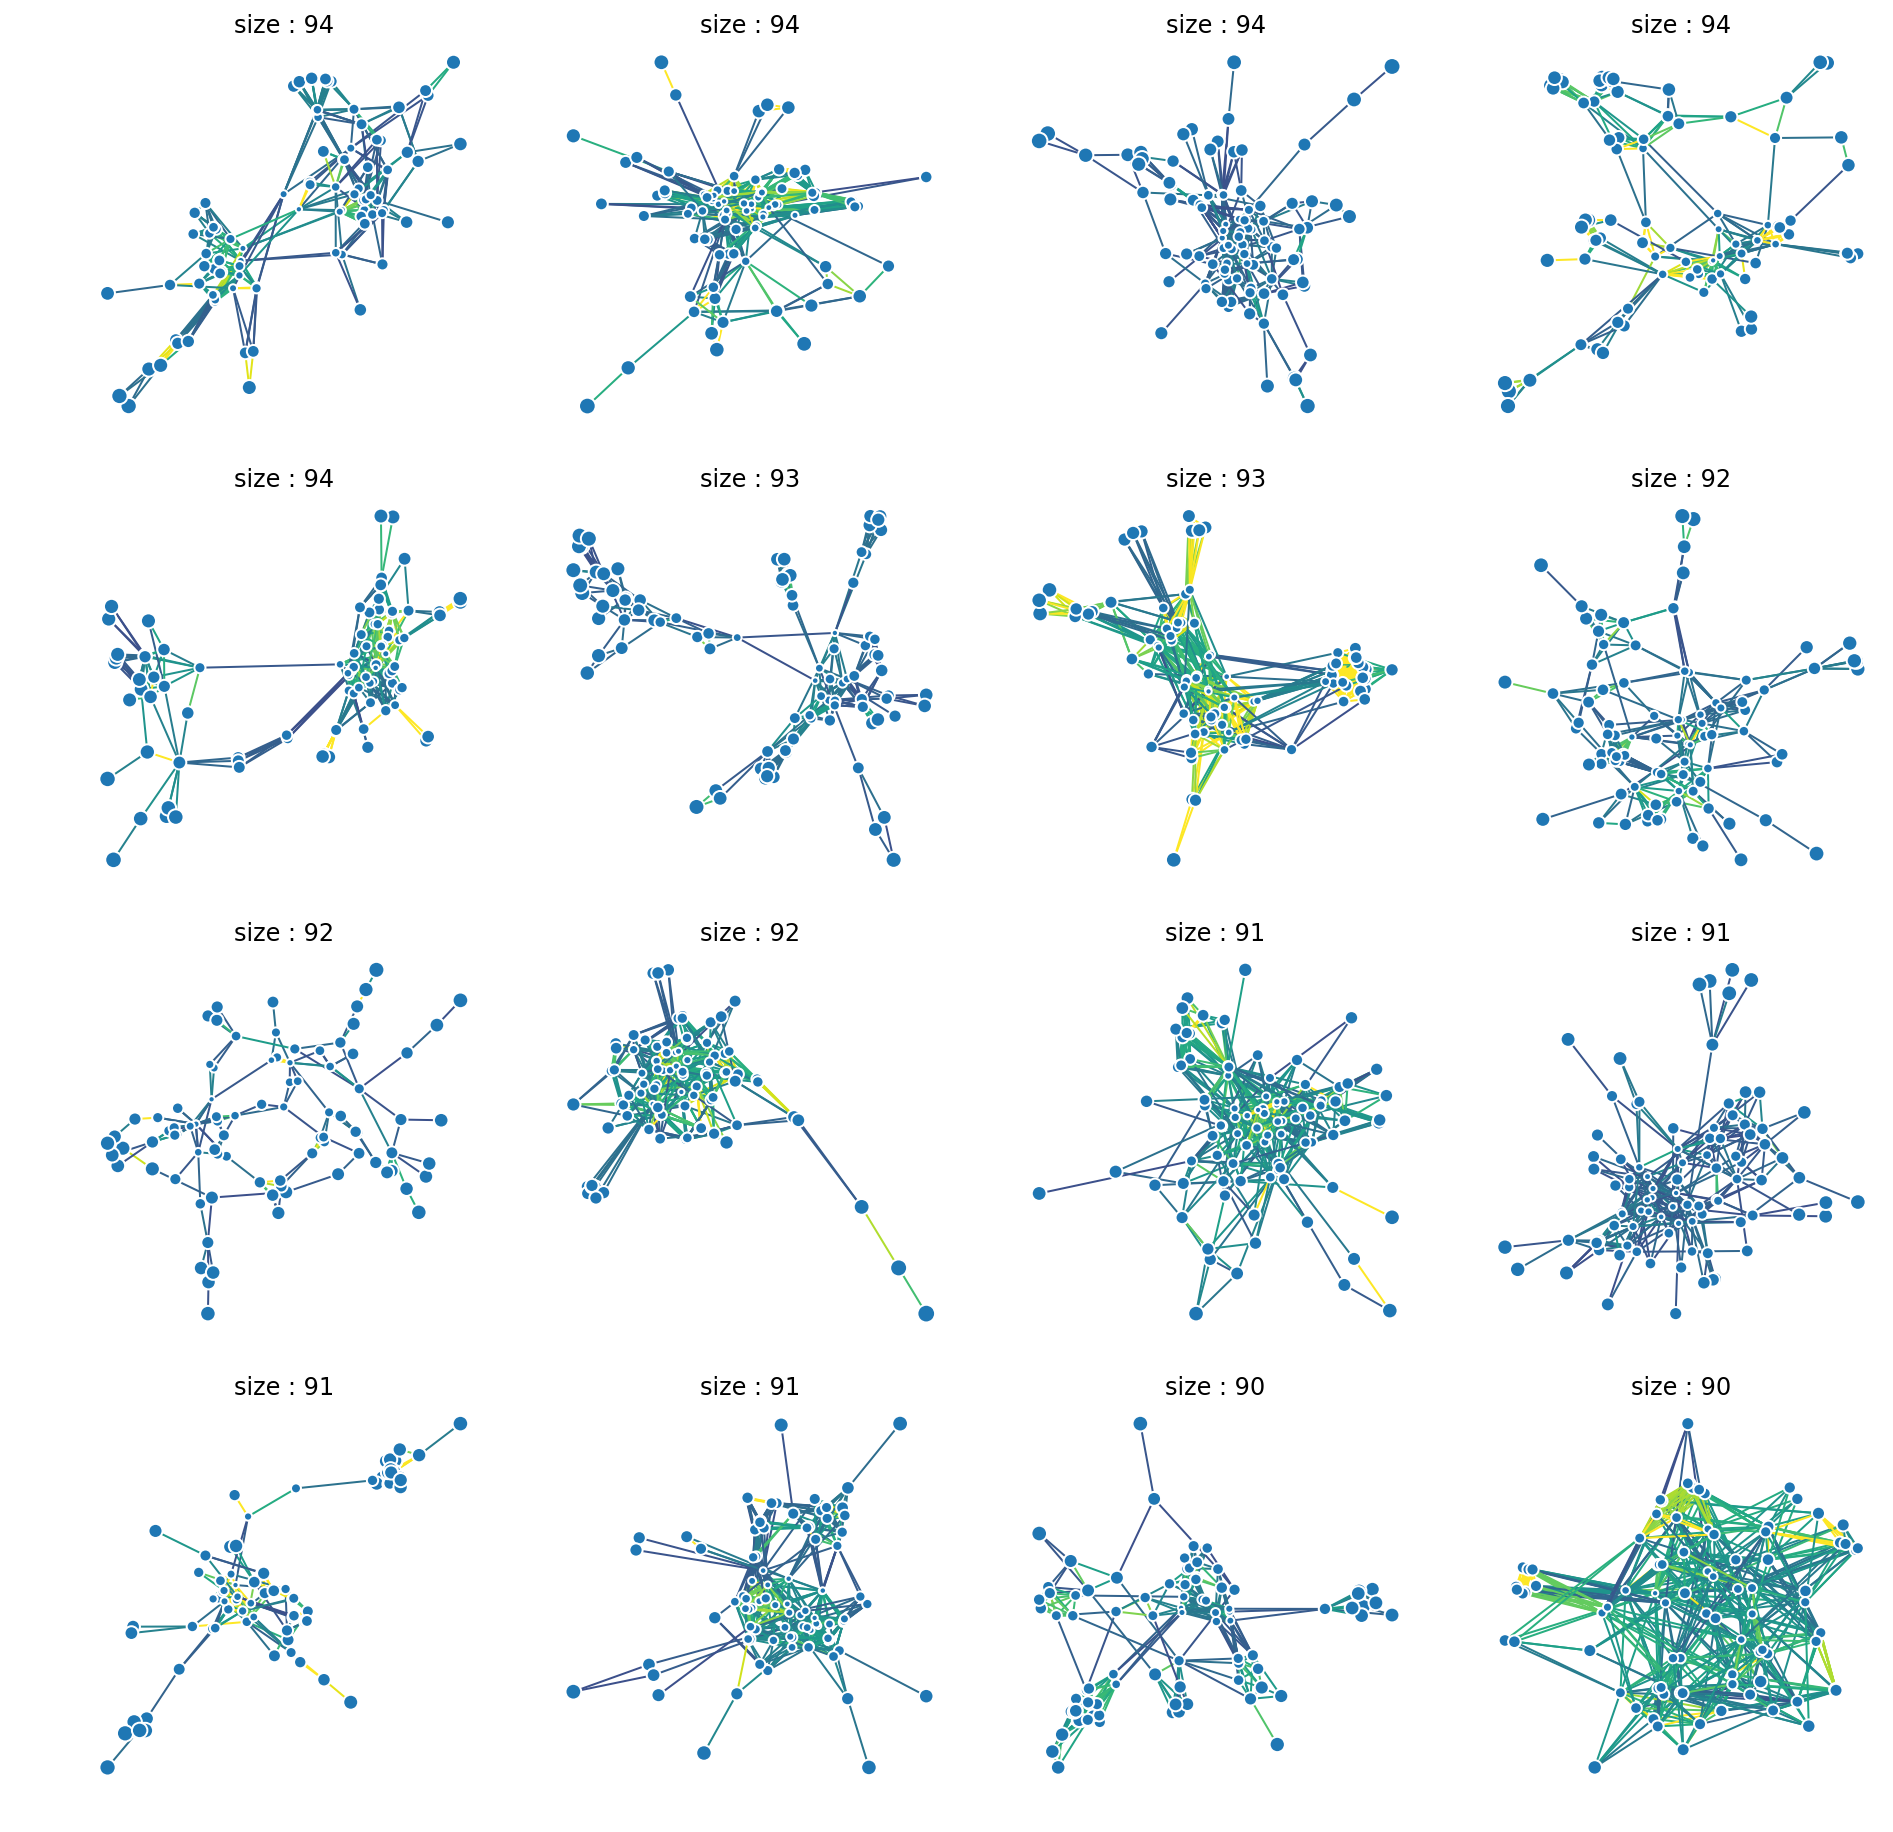

In [8]:
from grave import plot_network, use_attributes

figure( figsize = ( 16, 16 ) )

#def edge_style(edge_attrs):
#
#    alpha = edge_attrs['weight'] / 1000
#    return {'color' : 'black', 'alpha' : alpha }

def edge_style( edge_attributes ):
    return { 'linewidth' : edge_attributes.get( 'weight', 1 ) }

for n,g in enumerate(components[ 200:216 ]) :
    subplot( 4, 4, n+1 )
    title( ' : '.join( map( str, ('size', len(g) ) ) ) )
    
    centrality = networkx.closeness_centrality( g )
    max_centrality = max( centrality.values() )
    
    for node, node_attributes in g.nodes.data():
        node_attributes['size'] = ( 1 - ( centrality[node] /
                                    max_centrality) + .1 ) * 100
    
    
    for u, v, edge_attributes in g.edges.data():
        #c = (centrality[u] +
        #     centrality[v]) / 2
        #color_idx = (c / max_centrality)
        color_idx = ( edge_attributes['weight'] / bit_med )
        cmap = get_cmap()
        edge_attributes['color'] = cmap(color_idx)
        edge_attributes['width'] = 2
    
    #grave.plot_network( g, layout='spring', edge_style=edge_style )
    plot_network( g, layout='spring',
                  node_style=use_attributes(),
                  edge_style=use_attributes('color') )

## Phylogeography

#### Build phylogenetic trees from full-length alignments of protein families

We already have pairwise-alignments of our protein sequences from LAST, but now we want
multiple sequence alignments for each of the protein families using
[Clustal Omega](http://www.clustal.org/omega/). We'll use the MSAs to build approximate 
maximum likelihood trees using [`fasttree`](http://www.microbesonline.org/fasttree/).

In [33]:
import subprocess
from os.path import splitext
from os import environ

def clustalo( fasta_file, threads=1 ) :
    
    base = splitext(fasta_file)[0]
    alignment_file = base + '_clustalo.fasta'
    log_file = base + '_clustalo.log'

    args = ['clustalo', '-v', '--force',
            '-i', fasta_file,
            '--outfmt=fasta',
            '--threads=' + str(threads),
            '-o', alignment_file,
            '-l', log_file ]

    subprocess.call( args )
    return alignment_file


def fasttree( alignment_file, threads=1 ) :
    
    base = splitext(alignment_file)[0]
    tree_file = base + '_fasttree.tree'
    log_file = base + '_fasttree.log'
    
    e = environ
    e['OMP_NUM_THREADS'] = str(threads)
    
    args = ['FastTreeMP', '-gtr', '-log', log_file ] 

    with open( tree_file, 'w' ) as outfile:
        with open( alignment_file, 'r' ) as infile:
            proc = subprocess.Popen( args, env=e, stdout=outfile, stdin=infile )
            proc.wait()
    
    return tree_file

In [34]:
from tempfile import mkdtemp

N = 10000
progbar = pyprind.ProgBar( N-1, title='building trees for protein families...' )

treefiles = []
scratch = mkdtemp()
    
for n,g in enumerate( components[1:N] ) :

    progbar.update()   
    fasta = scratch + '/' + str(n) + '.fa'
    
    with open( fasta, 'w' ) as f :
        
        # generate FASTA file for protein family
        for node in g.nodes :
            f.write( '> ' + str(node) + '\n' + str(viralgenes[node].sequence) + '\n' )
        
    # build alignment and 
    treefiles.append( fasttree( clustalo( fasta, threads=40 ), threads=40 ) )

building trees for protein families...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 05:59:23


In [36]:
progbar = pyprind.ProgBar( len(treefiles), title='loading trees for protein families...' )
trees = []
for treefile in treefiles :
    progbar.update()
    trees.append( SuchTree( treefile ) )

loading trees for protein families...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:51


#### Load sample and mVC metadata

The metadata table contains some mVC's (metagenomic viral contigs, or putative viral genomes)
that we don't actually want because they come from samples that are not soil. So, we need to
remove them from the table before we continue.

In [37]:
metadata = pandas.read_csv( 'data/metadata.csv', sep=',', index_col=0, low_memory=False )

print( 'total records :', metadata.shape[0] )

filtered_mVCs = []
for line in open( 'data/soil_contigs.txt' ).readlines() :
    filtered_mVCs.append( line.replace( '.a:', '_____' ).strip() )
    
print( 'records to drop :', len( set( metadata.index ) ^ set( filtered_mVCs ) ) )

metadata = metadata.drop( set( metadata.index ) ^ set( filtered_mVCs ), axis=0 )
print( 'records retained :', metadata.shape[0] )

total records : 36384
records to drop : 12050
records retained : 24334


#### Extract sample geolocations

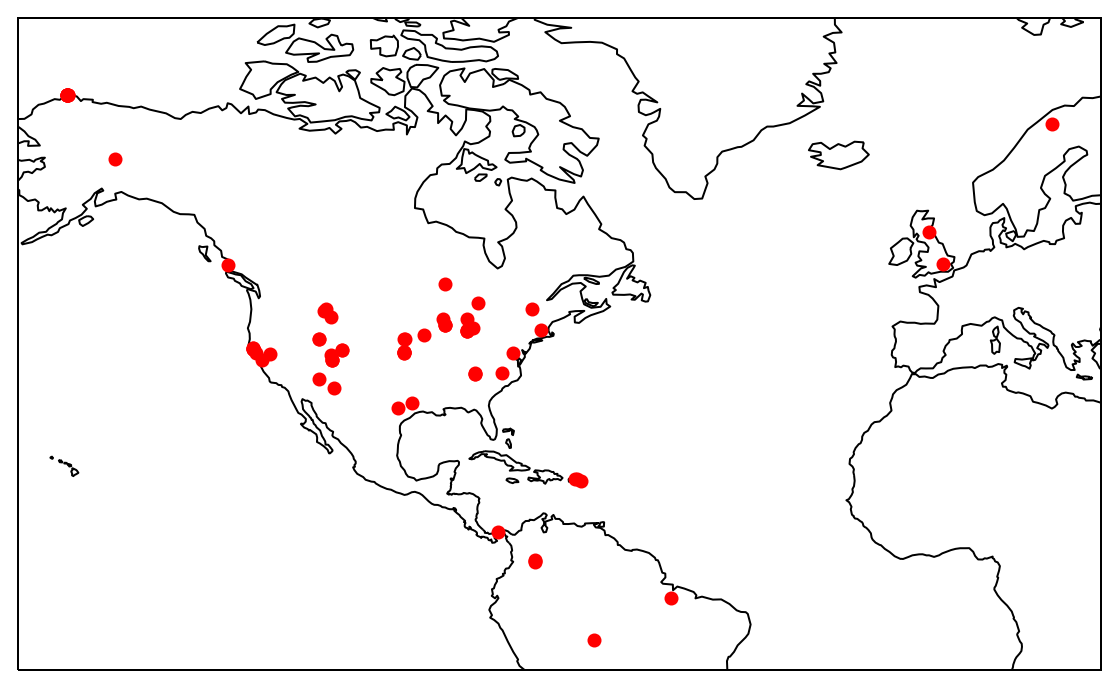

In [38]:
figure( figsize=(12,6) )

# this is kinda horrible, but whatever
locstrings = set( ','.join( (str(a),str(b)) ) for a,b in zip( list( metadata.Latitude ), 
                                                              list( metadata.Longitude ) ) ) 

locations = []
for locstring in locstrings :
    lat, lon = locstring.split(',')
    if lat == 'nan' : continue
    locations.append( ( float(lat), float(lon) ) )

ax = plt.axes( projection=cartopy.crs.Miller() )
#ax.add_image( GoogleTiles( style='satellite' ), 3 )
ax.coastlines()

y, x = zip(*locations)
plot( x, y, 'ro', transform=cartopy.crs.Geodetic() )

#### Haversine (great circle) distances

In [60]:
from math import radians, cos, sin, asin, sqrt
from itertools import combinations

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    
    https://stackoverflow.com/questions/4913349/#4913653    
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def geo_distance_pairs( tree ) :
    node_locations = {}
    for node in tree.leafs.keys() :
        mVC = '_____'.join( node.split('_____')[:2] )
        #if mVC in metadata.index : continue
        lat = metadata.loc[ mVC ].Latitude
        lon = metadata.loc[ mVC ].Longitude
        #if isnan(lat) or isnan(lon) : continue
        node_locations[node] = ( lat, lon )

    for node1, node2 in combinations( tree.leafs.keys(), 2 ) :
        lat1, lon1 = node_locations[ node1 ]
        lat2, lon2 = node_locations[ node2 ]
        yield haversine(lon1, lat1, lon2, lat2)

#### Calculate haversine and phylogenetic distances

Text(27.125,0.5,'Phylogenetic distance')

<Figure size 864x432 with 0 Axes>

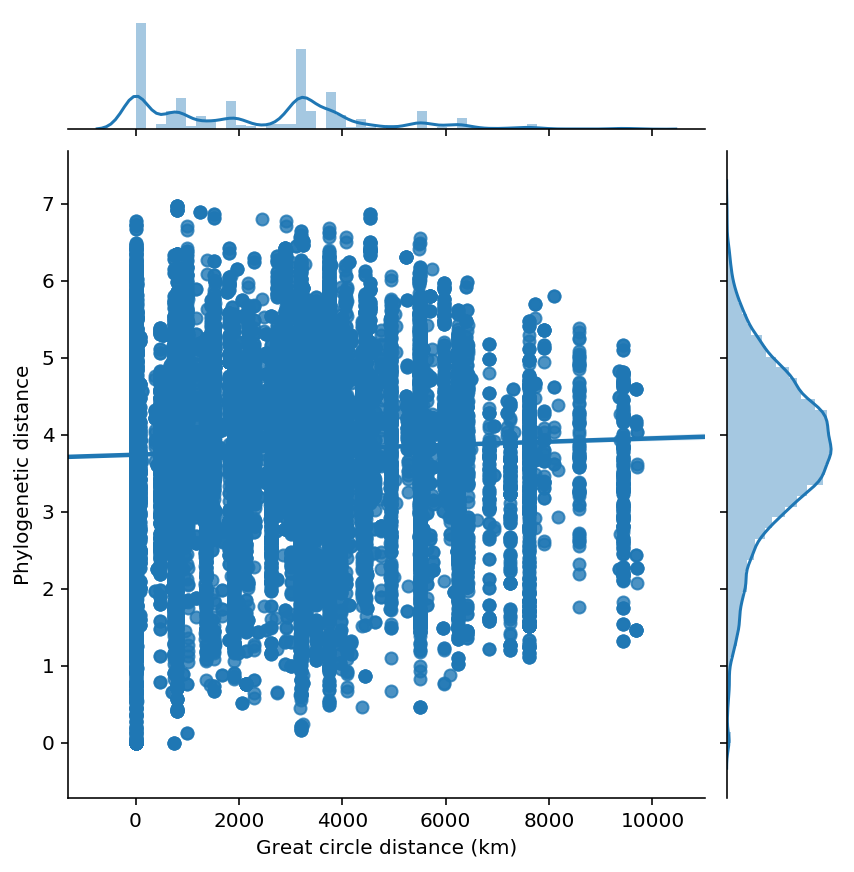

In [114]:
figure( figsize=(12,6) )

tree = trees[25]

geodist = list( geo_distance_pairs( tree ) )
phylodist = tree.distances_by_name( list( combinations( tree.leafs.keys(), 2 ) ) )

seaborn.jointplot( geodist, phylodist, kind='reg' )
xlabel( 'Great circle distance (km)' )
ylabel( 'Phylogenetic distance' )

In [91]:
progbar = pyprind.ProgBar( len(trees), title='calculating geographic and phylogenetic distances for protein families...' )

distances = []
for tree in trees :
    progbar.update()
    
    geodist = list( geo_distance_pairs( tree ) )
    phylodist = tree.distances_by_name( list( combinations( tree.leafs.keys(), 2 ) ) )
    
    # drop cases where the geographic distance is undefined
    gd = delete( geodist,   argwhere( isnan(geodist) ) )
    pd = delete( phylodist, argwhere( isnan(geodist) ) )
    
    distances.append( ( gd, pd ) )

calculating geographic and phylogenetic distances for protein families...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:02:10


#### Calculate correlations between haversine and phylogenetic distances, correct p-values for multiple tests 

We use Kendall's $\tau$ rank-order correlation because we cannot assume that the distributions
of either distance measure will be normal. Then, we apply the 
[Simes-Hochberg](https://en.wikipedia.org/wiki/Family-wise_error_rate) step-up procedure to correct
the p-values for multiple  tests.


In [175]:
from scipy.stats import pearsonr, kendalltau
from statsmodels.stats.multitest import multipletests

correlations = pandas.DataFrame( kendalltau(a,b) for a,b in distances )

correlations['size'] = [ tree.n_leafs for tree in trees ]
correlations['total_pd'] = [ sum( tree.adjacency()['adjacency_matrix'] ) / 2.0 for tree in trees ]
correlations['aspect'] = [ sum( tree.adjacency()['adjacency_matrix'] ) / ( 2.0 * tree.n_leafs ) for tree in trees ]

reject, corrected_p, alphacSidak, alphacBonf = multipletests( correlations.dropna().pvalue, 
                                                              alpha=0.05,
                                                              method='simes-hochberg' )

correlations['reject'] = pandas.DataFrame( reject, index=correlations.dropna().index )
correlations['corrected_p'] = pandas.DataFrame( corrected_p, index=correlations.dropna().index )

print( 'protein families with statisticailly significant phylogeography :', 
       correlations[ correlations.reject == True ].shape[0] )

correlations.head()

protein families with statisticailly significant phylogeography : 1242


correlation        pvalue  size     total_pd    aspect reject   corrected_p
0     0.051172  0.000000e+00  2155  1038.831618  0.482056   True  0.000000e+00
1     0.005041  4.074258e-10  1235   278.769138  0.225724   True  2.644601e-06
2    -0.008637  3.839681e-12   799   416.604089  0.521407   True  2.542253e-08
3    -0.000881  5.297023e-01   699   311.852587  0.446141  False  1.000000e+00
4     0.028334  4.647132e-77   644   275.972912  0.428529   True  3.245092e-73

Let's look at the distribution of correlations for the protein families where we can
reject the null hypothesis.

([<matplotlib.axis.XTick at 0x2aeb6f6da320>,
 <a list of 5 Text xticklabel objects>)

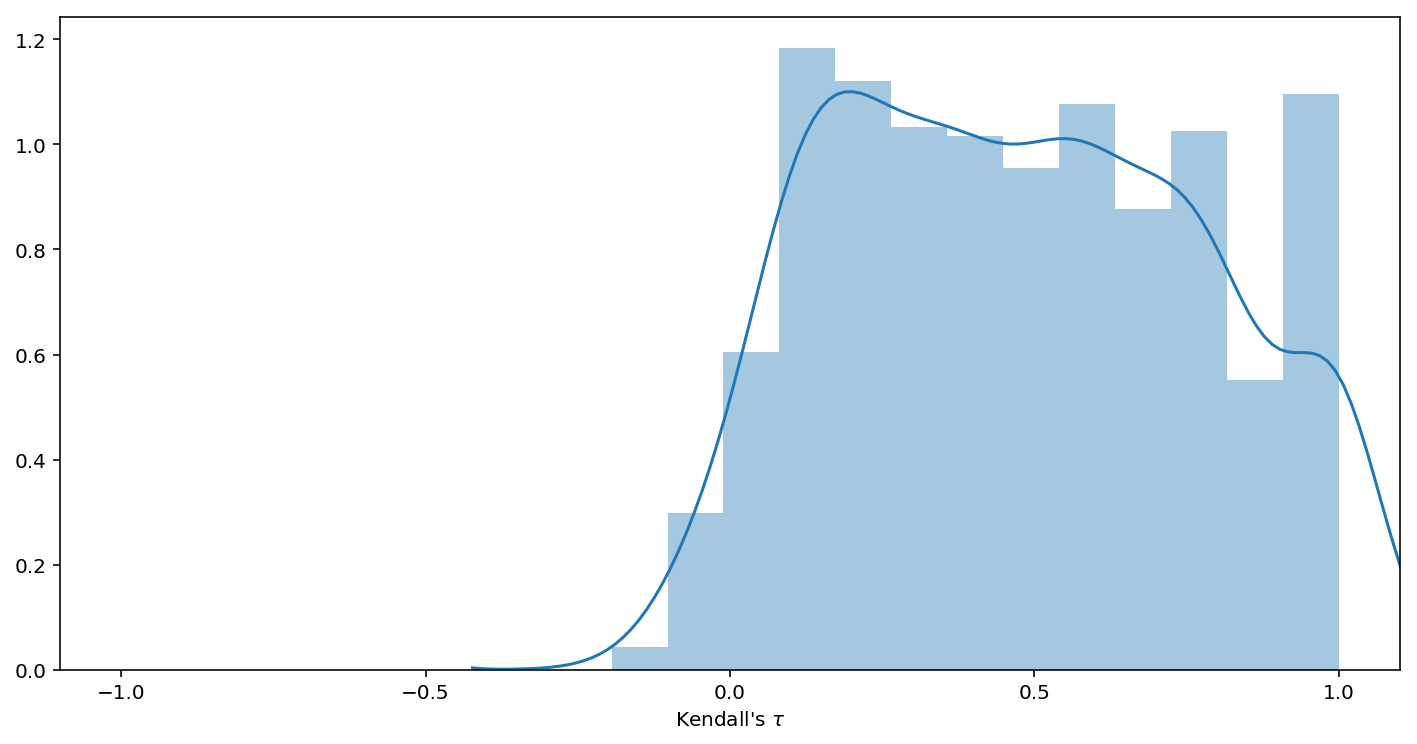

In [165]:
figure( figsize=(12,6) )

seaborn.distplot( correlations[ correlations.reject == True ].correlation )
xlabel( r"Kendall's $\tau$" )
xlim( -1.1, 1.1 )
xticks( [-1, -0.5, 0.0, 0.5, 1 ])

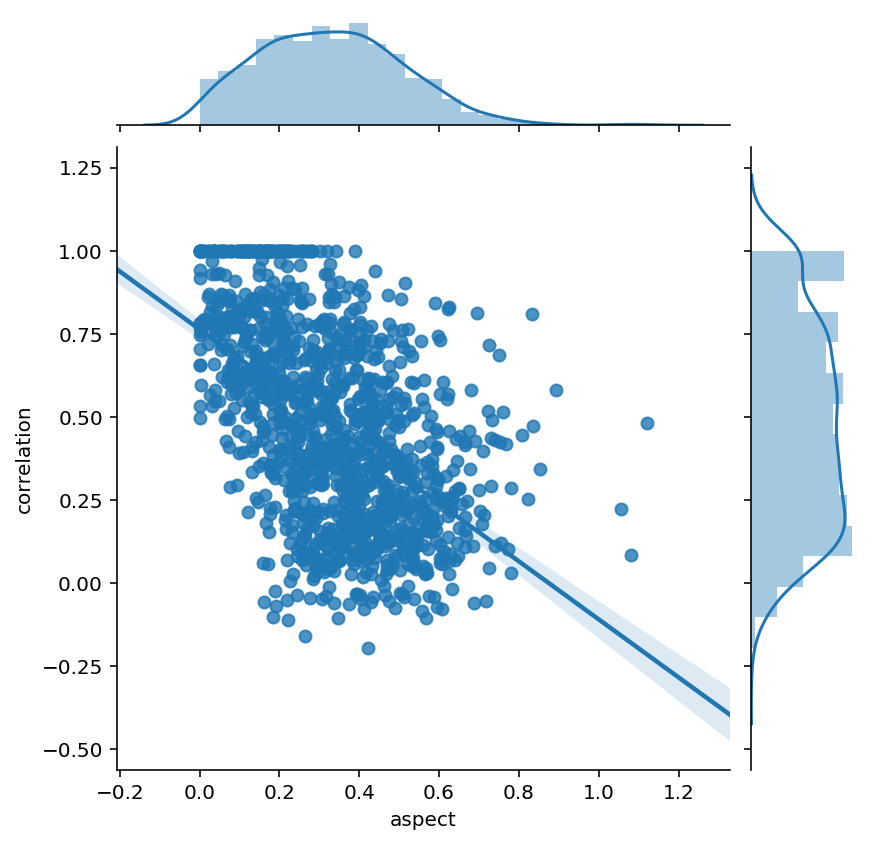

In [170]:

seaborn.jointplot( x='aspect', y='correlation', data=correlations[ correlations.reject == True ], kind='reg' )

Protein families with a higher aspect ratio (total phylogenetic distance per member) tend to have lower
correlations between their geographic distance and phylogenetic distances. This suggests that the biogeography
of viral protein families is driven by founder effects, not allopatric speciation.

## Functional profiles of viral protein families

In [229]:
with open( 'data/genes_vs_pfams.txt' ) as f :
    pfam_hits = {}
    gene_hits = {}
    for line in f.readlines() :
        gene = '_____'.join( line.split()[:3] )
        if len( line.split() ) <= 3 : continue
        pfams = [ pfam.replace('pfam','PF') for pfam in line.split()[3].split(',') ]
        pfam_hits[gene] = pfams
        for pfam in pfams :
            if not pfam in gene_hits :
                gene_hits[pfam] = []
            gene_hits[pfam].append( gene )

all_hits = []
for n,tree in enumerate(trees) :
    pfams = []
    for gene in tree.leafs.keys() :
        if gene in pfam_hits :
            pfams.extend( pfam_hits[gene] )
    all_hits.append(pfams)

How many of our viral protein families are totally novel, at least as far as Pfam is concerned?

In [214]:
sum( len(set(hits)) == 0 for hits in all_hits ) / sum(len(all_hits))

0.78967896789678971

Wow! That's most of them! Well, let's have a look at some of the ones that have annotations.

In [205]:
names=['Pfam accession', 'clan accession', 'clan ID', 'Pfam ID', 'Pfam description']
usecols=['Pfam accession', 'Pfam ID', 'Pfam description']
pfam_table = pandas.read_csv( 'data/Pfam-A.clans.tsv', sep='\t', names=names, usecols=usecols )
pfam_table.head()

Pfam accession   Pfam ID                                   Pfam description
0        PF00001     7tm_1        7 transmembrane receptor (rhodopsin family)
1        PF00002     7tm_2         7 transmembrane receptor (Secretin family)
2        PF00003     7tm_3     7 transmembrane sweet-taste receptor of 3 GCPR
3        PF00004       AAA  ATPase family associated with various cellular...
4        PF00005  ABC_tran                                    ABC transporter

In [275]:
for row in pfam_table[ pfam_table['Pfam description'].str.contains('glycoside') ].values :
    pfam = row[0]
    if pfam in gene_hits :
        samples = []
        for gene in gene_hits[pfam] :
            samples.append( '_____'.join( gene.split('_____')[:2] ) )
        print(pfam, samples)

PF04655 ['3300005336_____Ga0070680_100000178']
PF14323 ['3300012357_____Ga0137384_10000154']


In [278]:
pfam_table[ pfam_table['Pfam description'].str.contains('glycoside') ]

Pfam accession          Pfam ID  \
2340         PF02522   Antibiotic_NAT   
4302         PF04655        APH_6_hur   
9932         PF10706  Aminoglyc_resit   
13447        PF14323        GxGYxYP_C   
13988        PF14872             GHL5   
15232        PF16141          DUF4849   

                                        Pfam description  
2340                Aminoglycoside 3-N-acetyltransferase  
4302   Aminoglycoside/hydroxyurea antibiotic resistan...  
9932              Aminoglycoside-2''-adenylyltransferase  
13447  GxGYxYP putative glycoside hydrolase C-termina...  
13988                 Hypothetical glycoside hydrolase 5  
15232  Putative glycoside hydrolase Family 18, chitin...

In [285]:
pfam_table.loc[13447]['Pfam description']

'GxGYxYP putative glycoside hydrolase C-terminal domain'

In [289]:
vfam_pfams = []
for n,g in enumerate( components ) :
    pfams = []
    for gene in g.nodes :
        if gene in pfam_hits :
            pfams.extend( pfam_hits[gene] )
    vfam_pfams.append(pfams)

In [352]:
#sorted( [ len(vfam) for vfam in vfam_pfams ], reverse=True )
#[ len(vfam) for vfam in vfam_pfams ].index(1232)

def most_common(lst):
    return max(set(lst), key=lst.count)

def pfam_annotation( vfam_index ) :
    if len(vfam_pfams[vfam_index]) > 0 :
        pfam = most_common( vfam_pfams[vfam_index] )
        return pfam_table[ pfam_table['Pfam accession'] == pfam ]['Pfam description'].values[0]
    else :
        return 'Novel protein family'

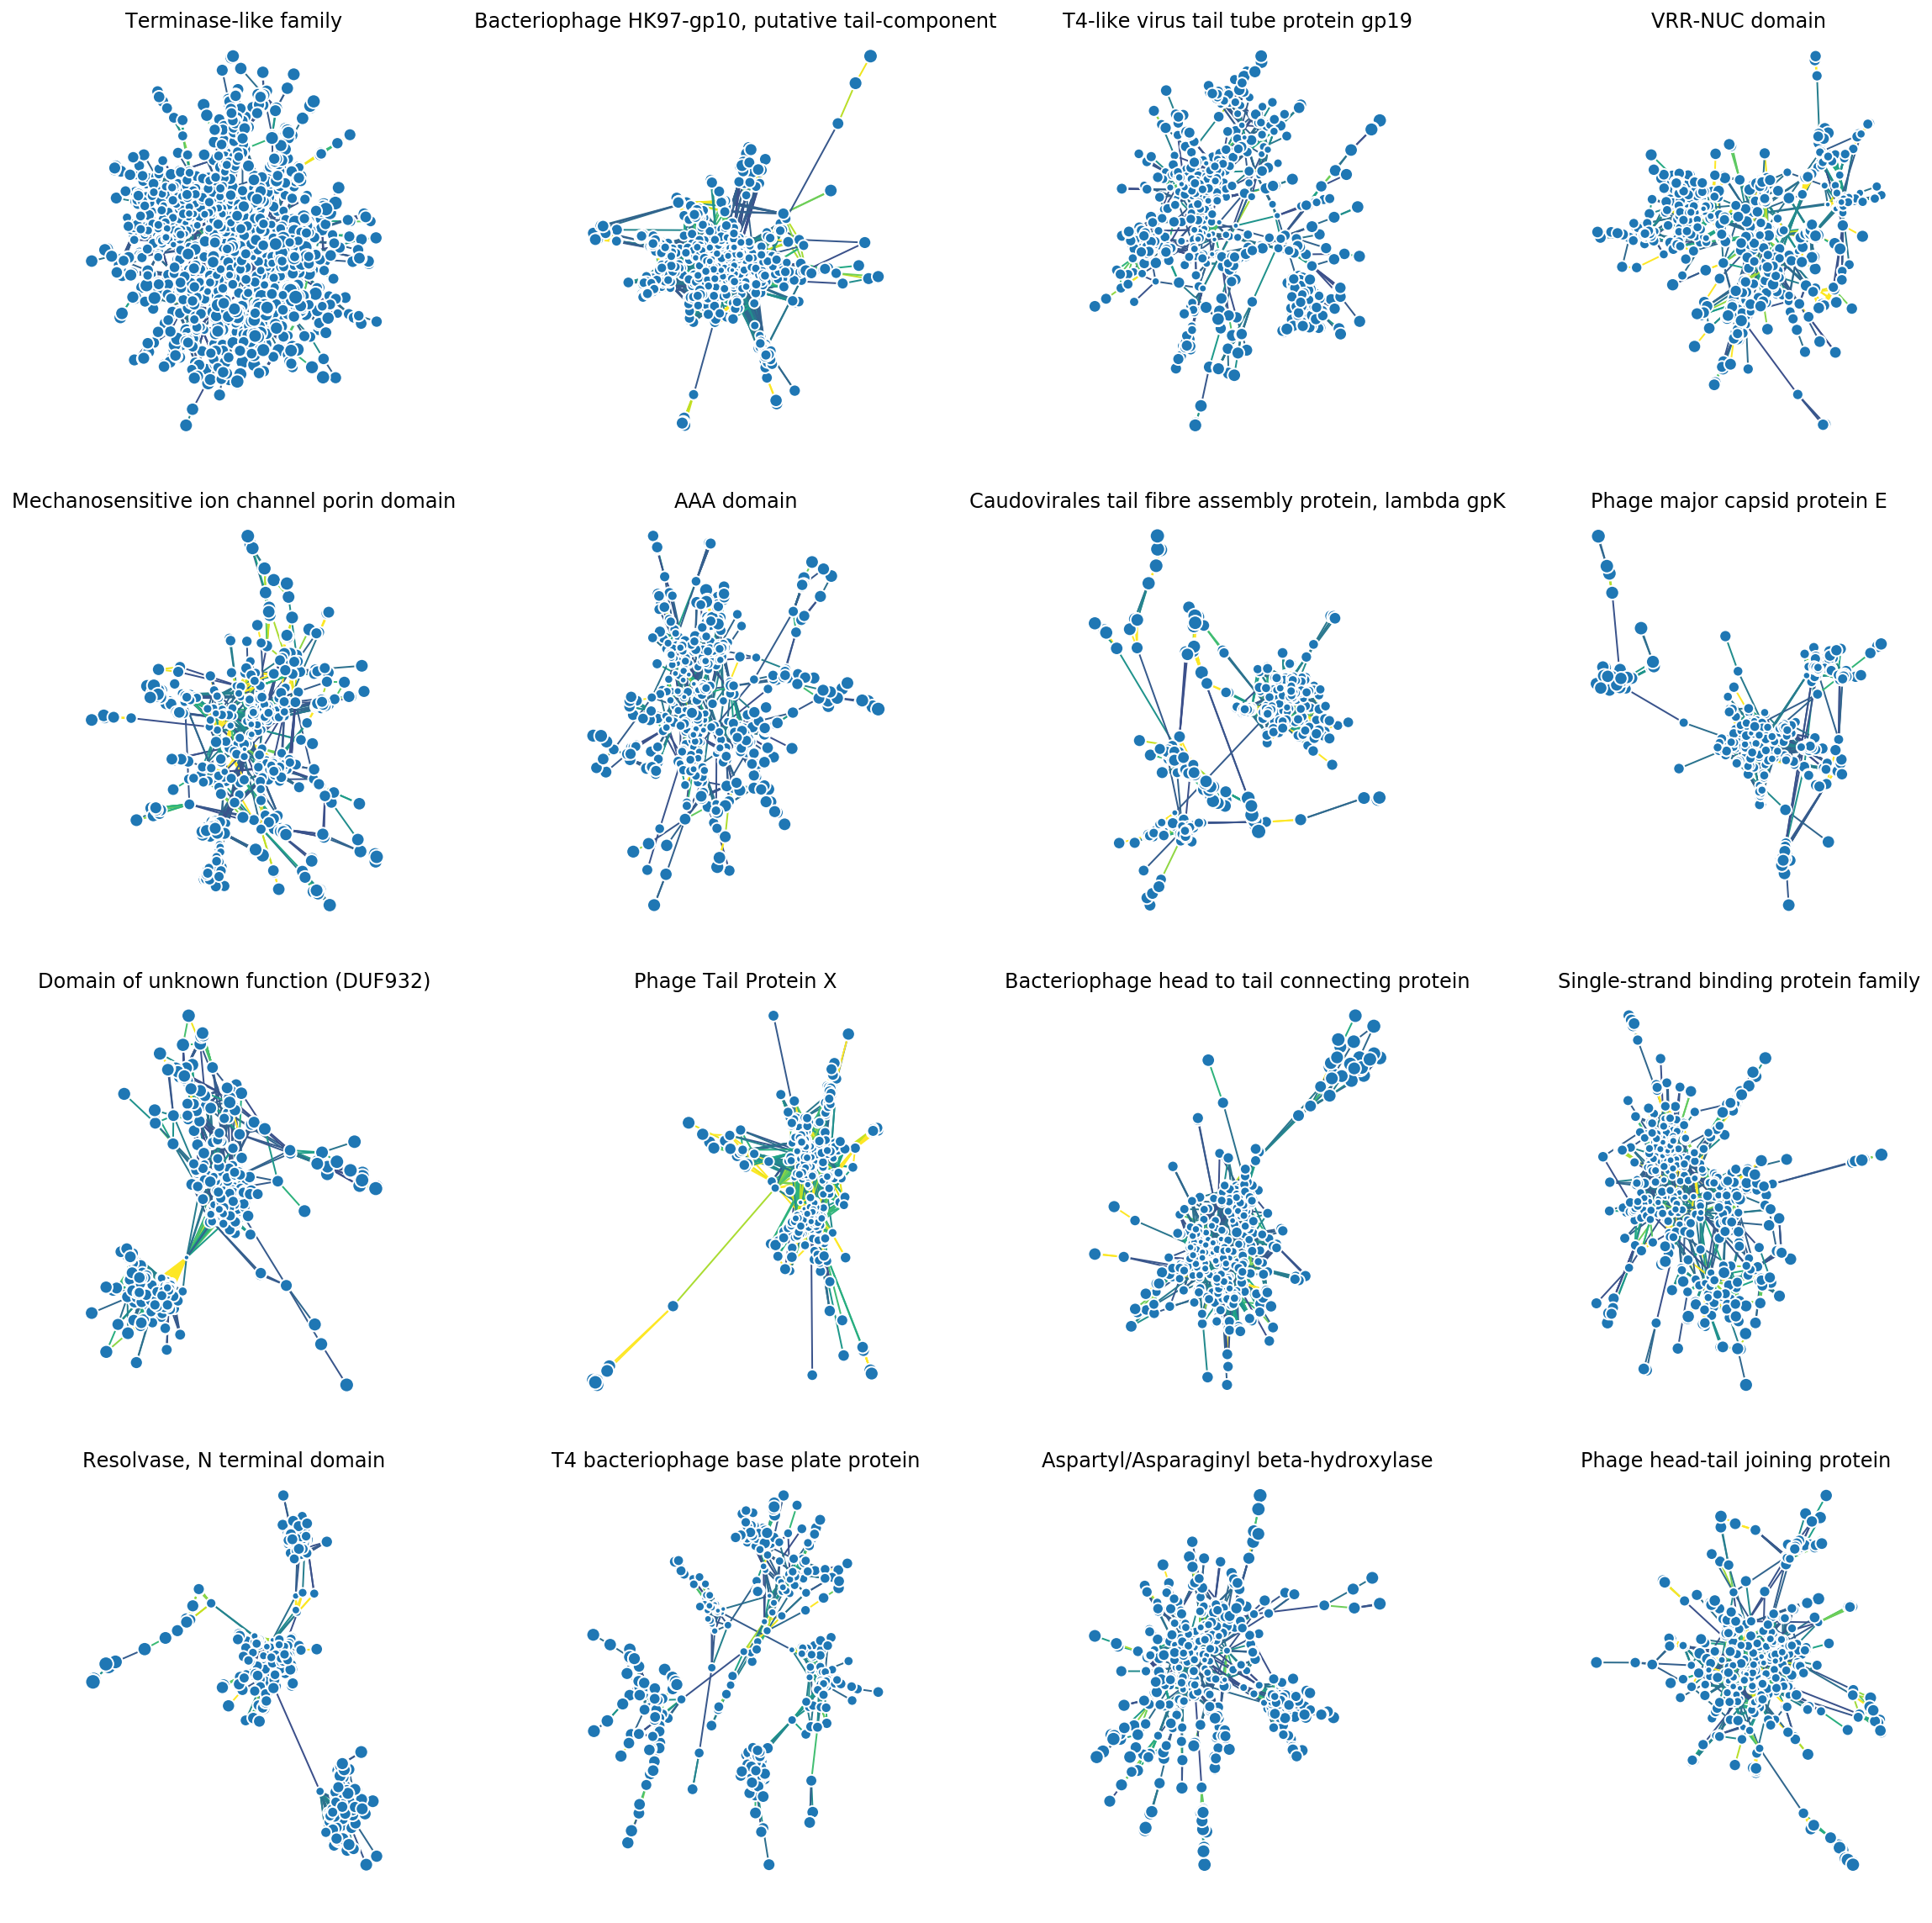

In [355]:
from grave import plot_network, use_attributes

figure( figsize = ( 16, 16 ) )

#def edge_style(edge_attrs):
#
#    alpha = edge_attrs['weight'] / 1000
#    return {'color' : 'black', 'alpha' : alpha }

def edge_style( edge_attributes ):
    return { 'linewidth' : edge_attributes.get( 'weight', 1 ) }

for n,g in enumerate(components[ 1:17 ]) :
    subplot( 4, 4, n+1 )
    #title( ' : '.join( map( str, ('size', len(g) ) ) ) )
    title( pfam_annotation(n) )
    
    centrality = networkx.closeness_centrality( g )
    max_centrality = max( centrality.values() )
    
    for node, node_attributes in g.nodes.data():
        node_attributes['size'] = ( 1 - ( centrality[node] /
                                    max_centrality) + .1 ) * 100
    
    
    for u, v, edge_attributes in g.edges.data():
        #c = (centrality[u] +
        #     centrality[v]) / 2
        #color_idx = (c / max_centrality)
        color_idx = ( edge_attributes['weight'] / bit_med )
        cmap = get_cmap()
        edge_attributes['color'] = cmap(color_idx)
        edge_attributes['width'] = 2
    
    #grave.plot_network( g, layout='spring', edge_style=edge_style )
    plot_network( g, layout='spring',
                  node_style=use_attributes(),
                  edge_style=use_attributes('color') )
tight_layout()

## References

<div class="cite2c-biblio"></div>